# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import pandas as pd
from types import SimpleNamespace
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
from scipy import optimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import *

# Question 1

The goal of this question is to examine what happens to the ratio $\frac{H_F}{H_M}$ when the paramter values of $\alpha$ and $\sigma$ changes.


To begin with the model parameters are defined. Then a loop is created for examining what happens to the $\frac{H_F}{H_M}$ when $\alpha$ and $\sigma$ vary. Finally, a table is created to present the results.  

In [87]:
# Set model
model_one = HouseholdSpecializationModelClass()

# Empty array for storing results
results = np.zeros((3,3))

# Different alpha and sigma values
alpha_vec = [0.25, 0.5, 0.75]
sigma_vec = [0.5, 1, 1.5]

# Looping for alpha and sigma values
for i, alpha in enumerate(alpha_vec):
    for j, sigma in enumerate(sigma_vec):
        # setting parameter values and solving the model
        model_one.par.alpha = alpha
        model_one.par.sigma = sigma

        solution = model_one.solve_discrete()

        # storing the HF/HM ratio
        results[i, j] = solution.HF/solution.HM
        
table = pd.DataFrame(results, columns=[sigma_vec], index=[alpha_vec])
print(table)

c:\Users\chris\Desktop\Polit\6. semester\Introduction to Programming and Numerical Analysis\projects-2023-c\inauguralproject\inauguralproject.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


           0.5       1.0       1.5
0.25  0.545455  0.307692  0.214286
0.50  1.000000  1.000000  1.000000
0.75  1.833333  3.250000  4.666667


# Question 2

The $\log\left(\frac{H_{F}}{H_{M}}\right)$ ratio will in this question be plotted against the $\log\left(\frac{w_{F}}{w_{M}}\right)$ ratio for varying values of $w_{F}$


To begin with the model is set and there is created a vector for the different values of $w_{F}$. Then, a loop is created to find the values. Finally, the results are plotted in a scatter plot. 

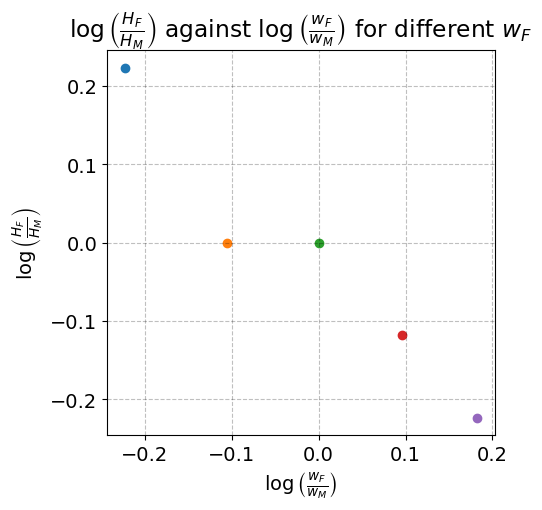

In [3]:
# Set model
model_two = HouseholdSpecializationModelClass()

# Different female wage values
wF_vec = [0.8, 0.9, 1.0, 1.1, 1.2]

# plot
fig, fig1 = plt.subplots(figsize=(5, 5))
fig1.set_title(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$" + " against " r"$\log\left(\frac{w_{F}}{w_{M}}\right)$" + " for different " r"$w_{F}$")
fig1.set_xlabel(r"$\log\left(\frac{w_{F}}{w_{M}}\right)$")
fig1.set_ylabel(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$")


# Creating loop for female wage values
for wF in wF_vec:
    model_two.par.wF = wF
    solution = model_two.solve_discrete()

    # defining the two log ratios
    log_HFHM = np.log(solution.HF/solution.HM)
    log_wFwM = np.log(wF/1)

    # add to plot
    fig1.scatter(log_wFwM, log_HFHM)

# Question 3

Question 2 will be reconsidered. The choice set is now continuous instead of discrete as before.

First, the model is defined. Then, the model is solved with the function solve_wF_vec() and plotted in a figure. 

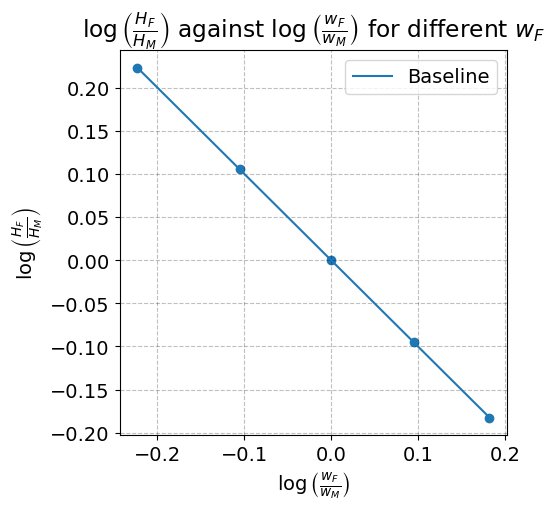

In [88]:
# Set model
model_three = HouseholdSpecializationModelClass()

# plot
fig, fig1 = plt.subplots(figsize=(5, 5))
fig1.set_title(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$" + " against " r"$\log\left(\frac{w_{F}}{w_{M}}\right)$" + " for different " r"$w_{F}$")
fig1.set_xlabel(r"$\log\left(\frac{w_{F}}{w_{M}}\right)$")
fig1.set_ylabel(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$")

# Solve the model
model_three.solve_wF_vec()
log_wFwM_c = np.log(model_three.par.wF_vec)
log_HFHM_c = np.log(model_three.sol.HF_vec/model_three.sol.HM_vec)

# add to plot
fig1.scatter(log_wFwM_c, log_HFHM_c)
fig1.plot(log_wFwM_c, log_HFHM_c, label="Baseline")
fig1.legend()

# Question 4

Initially, values for $\alpha$ and $\sigma$ which minimizes $\left(\beta_{0}-\hat{\beta}_{0}\right)^{2}+\left(\beta_{1}-\hat{\beta}_{1}\right)^{2}$ are found. This is done by using scipy optimize. 

It is then illustrated how the model fit the data.


In [38]:
# Set model
model_four = HouseholdSpecializationModelClass()

# Objective function
def objective_function(x):
    model_four.par.alpha = x[0]
    model_four.par.sigma = x[1]

    model_four.solve_wF_vec()
    model_four.run_regression()

    # saving beta hat values
    beta0 = model_four.sol.beta0
    beta1 = model_four.sol.beta1
    return (model_four.par.beta0_target - beta0)**2 + (model_four.par.beta1_target - beta1)**2

# Creating bounds and intitial guess
bounds = [(0,1), (0,1)]
guess = (0.5, 0.5)
result = optimize.minimize(objective_function, x0=guess, method="Nelder-Mead", bounds=bounds)
print(f'alpha = {result.x[0]:5.3f}\nsigma = {result.x[1]:5.3f}')

alpha = 0.9820
sigma = 0.1000


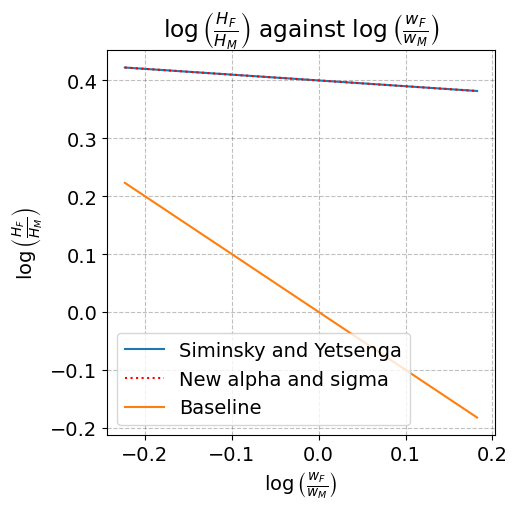

In [74]:
# The results from Siminsky and Yetsenga (2022)
model_five = HouseholdSpecializationModelClass()

fig, fig1 = plt.subplots(figsize=(5,5))

x = np.log(model_five.par.wF_vec)
y = model_five.par.beta0_target + model_five.par.beta1_target*x

fig1.plot(x, y, linestyle ='-', label = "Siminsky and Yetsenga")
fig1.set_title(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$" + " against " r"$\log\left(\frac{w_{F}}{w_{M}}\right)$")
fig1.set_xlabel(r"$\log\left(\frac{w_{F}}{w_{M}}\right)$")
fig1.set_ylabel(r"$\log\left(\frac{H_{F}}{H_{M}}\right)$")


# The model from earlier with the new alpha and sigma values
model_four.par.alpha = 0.9820
model_four.par.sigma = 0.1
model_four.solve()
x_1 = np.log(model_four.par.wF_vec)
y_1 = model_four.par.beta0_target + model_four.par.beta1_target*x
fig1.plot(x_1, y_1, color = "red", linestyle=':', label="New alpha and sigma")

# Baseline model
model_three.solve_wF_vec()
x_2 = np.log(model_three.par.wF_vec)
y_2 = np.log(model_three.sol.HF_vec/model_three.sol.HM_vec)

fig1.plot(x_2, y_2, linestyle='-', label="Baseline")


# add to plot
fig1.legend()
plt.show()


It appears on the figure that using the new values $\left(\alpha,\sigma\right)=\left(0.982,0.100\right)$ yields results that align quite well with Siminsky and Yetsenga.

Comparing these findings with the baseline model with $\left(\alpha,\sigma\right)=\left(0.5,1\right)$ it is clear that baseline is way steeper and intercepts the y-axis at a lower level.

The difference is a result of $\alpha = 0.982$ implies that males have a very small productivity at home relative to females. Furthermore, the elasticity of substitution is also way smaller in Siminsky and Yetsenka $\sigma = 0.1$  